In [361]:
from builtins import type

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [362]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    'dataset',
    image_size=(256, 256),
    batch_size=1,
    seed=123,
    validation_split=0.2,
    subset="training",
    # label_mode='categorical'
)

val_dataset = image_dataset_from_directory(
    'dataset',
    image_size=(256, 256),
    batch_size=1,
    seed=123,
    validation_split=0.2,
    subset="validation",
    # label_mode='categorical'
)

Found 6570 files belonging to 3 classes.
Using 5256 files for training.
Found 6570 files belonging to 3 classes.
Using 1314 files for validation.


In [271]:
# def relabel_map(image, label):
#     new_label = 0 if label == 0 else 1
#     return [image, [new_label]]
# 
# 
# train_dataset = train_dataset.map(relabel_map)
# val_dataset = val_dataset.map(relabel_map)

In [363]:
train_dataset = train_dataset.unbatch().filter(lambda _, classType: tf.not_equal(classType, 2)).batch(1)
val_dataset = val_dataset.unbatch().filter(lambda _, classType: tf.not_equal(classType, 2)).batch(1)

In [375]:
for elem in train_dataset.take(10):
    print(elem[1])

tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)


In [273]:
import keras
from keras import layers
from keras import Input

inputs = Input(shape=(256, 256, 3))
x = layers.Rescaling(1. / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [274]:
model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_26 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_118 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_91 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_119 (Conv2D)         (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                    

In [275]:
# model.compile(optimizer='adam', loss='categorical_crossentropy',
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics='accuracy')

In [276]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,
                           verbose=1)
checkpoint = ModelCheckpoint('/temp/tomato_model-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                             monitor='val_accuracy', mode='max',
                             verbose=1, save_best_only=True)
callbacks_list = [early_stop, checkpoint]

In [324]:
# history = model.fit(train_dataset, epochs=70, validation_data=validation_dataset)
history = model.fit(
    train_dataset,
    epochs=70,
    validation_data=val_dataset,
    # batch_size=128,
    # validation_split=0.2,
    callbacks=callbacks_list
)


Epoch 1/70
   3980/Unknown - 484s 121ms/step - loss: 0.7133 - accuracy: 0.6445
Epoch 1: val_accuracy improved from -inf to 0.49449, saving model to /temp\tomato_model-01-0.494.hdf5
3980/3980 [==============================] - 515s 129ms/step - loss: 0.7133 - accuracy: 0.6445 - val_loss: 0.8358 - val_accuracy: 0.4945
Epoch 2/70
3980/3980 [==============================] - ETA: 0s - loss: 0.3321 - accuracy: 0.8688
Epoch 2: val_accuracy improved from 0.49449 to 0.85886, saving model to /temp\tomato_model-02-0.859.hdf5
3980/3980 [==============================] - 536s 135ms/step - loss: 0.3321 - accuracy: 0.8688 - val_loss: 0.3070 - val_accuracy: 0.8589
Epoch 3/70
3980/3980 [==============================] - ETA: 0s - loss: 0.2556 - accuracy: 0.9080
Epoch 3: val_accuracy improved from 0.85886 to 0.93293, saving model to /temp\tomato_model-03-0.933.hdf5
3980/3980 [==============================] - 722s 181ms/step - loss: 0.2556 - accuracy: 0.9080 - val_loss: 0.1870 - val_accuracy: 0.9329
Ep

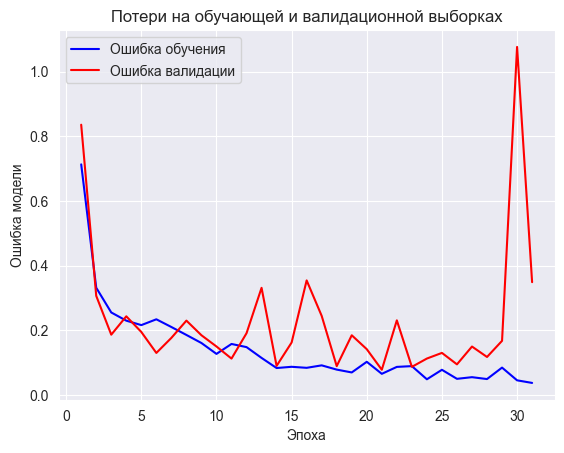

In [325]:
loss_function = history.history['loss']
val_loss_function = history.history['val_loss']
epochs = range(1,len(loss_function)+1)
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели')
plt.legend()
plt.show()

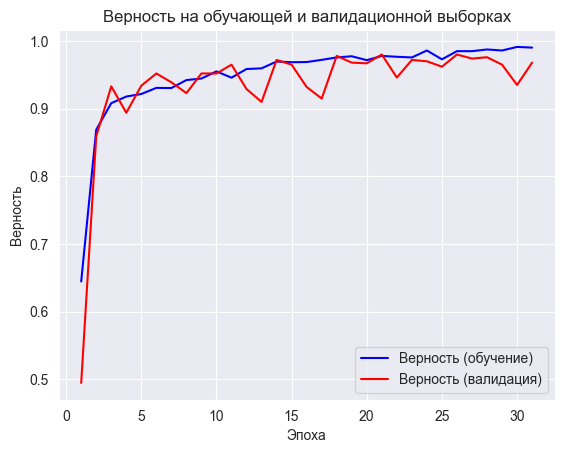

In [326]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.title('Верность на обучающей и валидационной выборках')
plt.plot(epochs,accuracy,color='blue',label='Верность (обучение)')
plt.plot(epochs,val_accuracy,color='red',label='Верность (валидация)')
plt.xlabel('Эпоха')
plt.ylabel('Верность')
plt.legend()
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------

In [364]:
import keras
from keras import layers
from keras import Input

inputs = Input(shape=(256, 256, 3))
x = layers.Rescaling(1. / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
# x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
dropout_model = keras.Model(inputs=inputs, outputs=outputs)

In [365]:
dropout_model.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_33 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_153 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_119 (MaxPool  (None, 127, 127, 32)      0         
 ing2D)                                                          
                                                                 
 conv2d_154 (Conv2D)         (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_120 (MaxPool  (None, 62, 62, 64)        0         
 ing2D)                                                   

In [366]:
dropout_model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics='accuracy')

In [367]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,
                           verbose=1)
checkpoint = ModelCheckpoint('/temp/tomato_dropout_model-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                             monitor='val_accuracy', mode='max',
                             verbose=1, save_best_only=True)
callbacks_list = [early_stop, checkpoint]

In [368]:
history = dropout_model.fit(
    train_dataset,
    epochs=70,
    validation_data=val_dataset,
    callbacks=callbacks_list,
)


Epoch 1/70
   3980/Unknown - 508s 127ms/step - loss: 0.6723 - accuracy: 0.6349
Epoch 1: val_accuracy improved from -inf to 0.66366, saving model to /temp\tomato_dropout_model-01-0.664.hdf5
3980/3980 [==============================] - 536s 134ms/step - loss: 0.6723 - accuracy: 0.6349 - val_loss: 0.6415 - val_accuracy: 0.6637
Epoch 2/70
3980/3980 [==============================] - ETA: 0s - loss: 0.6555 - accuracy: 0.6394
Epoch 2: val_accuracy did not improve from 0.66366
3980/3980 [==============================] - 458s 115ms/step - loss: 0.6555 - accuracy: 0.6394 - val_loss: 0.6396 - val_accuracy: 0.6637
Epoch 3/70
3980/3980 [==============================] - ETA: 0s - loss: 0.6555 - accuracy: 0.6394
Epoch 3: val_accuracy did not improve from 0.66366
3980/3980 [==============================] - 479s 120ms/step - loss: 0.6555 - accuracy: 0.6394 - val_loss: 0.6400 - val_accuracy: 0.6637
Epoch 4/70
3980/3980 [==============================] - ETA: 0s - loss: 0.6553 - accuracy: 0.6394
Epoc

KeyboardInterrupt: 